<a href="https://colab.research.google.com/github/oreomcflurryyy/statistical-learning-unsupervisedlearning/blob/main/unsupervisedlearning_3_7_8_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this problem, you will perform K-means clustering manually, with
K = 2, on a small example with n = 6 observations and p = 2
features. The observations are as follows.

| Obs. | X1 | X2 |
|------|----|----|
| 1    | 1  | 4  |
| 2    | 1  | 3  |
| 3    | 0  | 4  |
| 4    | 5  | 1  |
| 5    | 6  | 2  |
| 6    | 4  | 0  |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# (a) Plot the observations
observations = np.array([
    [1, 4],
    [1, 3],
    [0, 4],
    [5, 1],
    [6, 2],
    [4, 0]
])

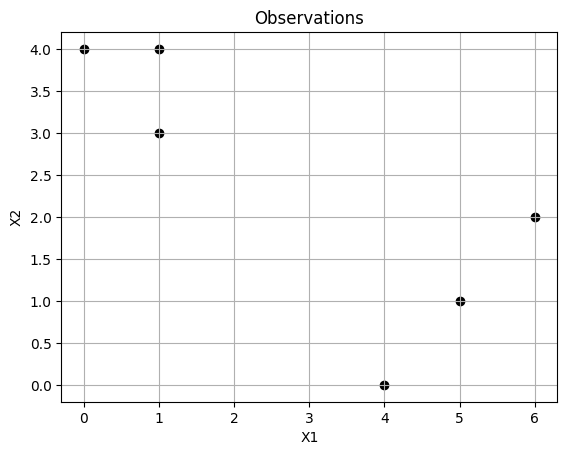

In [3]:
plt.scatter(observations[:, 0], observations[:, 1], c='black', label='Observations')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations')
plt.grid(True)
plt.show()

In [4]:
# (b) Randomly assign cluster labels
np.random.seed(0)
cluster_labels = np.random.choice([1, 2], size=6)
print("Initial Cluster Labels:", cluster_labels)

Initial Cluster Labels: [1 2 2 1 2 2]


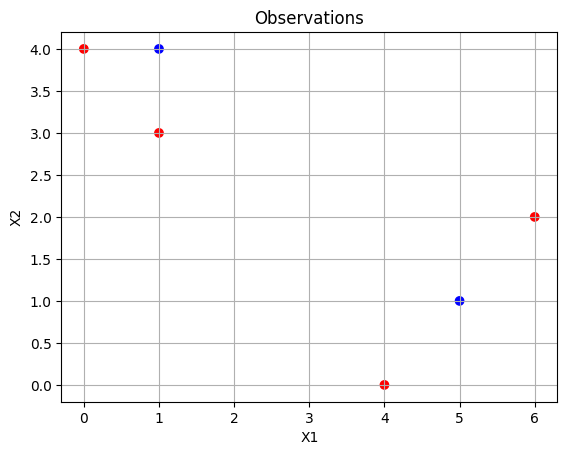

In [5]:
colors = ['blue' if label == 1 else 'red' for label in cluster_labels]
plt.scatter(observations[:, 0], observations[:, 1], c=colors, label='Clustered Observations')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations')
plt.grid(True)
plt.show()

In [6]:
def compute_centroids(observations, labels):
    centroids = []
    for k in [1, 2]:
        cluster_points = observations[labels == k]
        centroid = cluster_points.mean(axis=0)
        centroids.append(centroid)
    return np.array(centroids)

In [7]:
def assign_clusters(observations, centroids):
    distances = np.linalg.norm(observations[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1) + 1

In [8]:
# (c) Compute the centroid for each cluster
centroids = compute_centroids(observations, cluster_labels)
print("Initial Centroids:\n", centroids)

# (d) Assign each observation to the nearest centroid
new_labels = assign_clusters(observations, centroids)
print("Updated Cluster Labels:", new_labels)

Initial Centroids:
 [[3.   2.5 ]
 [2.75 2.25]]
Updated Cluster Labels: [2 2 2 1 1 2]


In [9]:
# (e) Repeat until convergence
while not np.array_equal(cluster_labels, new_labels):
    cluster_labels = new_labels
    centroids = compute_centroids(observations, cluster_labels)
    new_labels = assign_clusters(observations, centroids)
    print("Updated Cluster Labels:", new_labels)

Updated Cluster Labels: [2 2 2 1 1 1]
Updated Cluster Labels: [2 2 2 1 1 1]


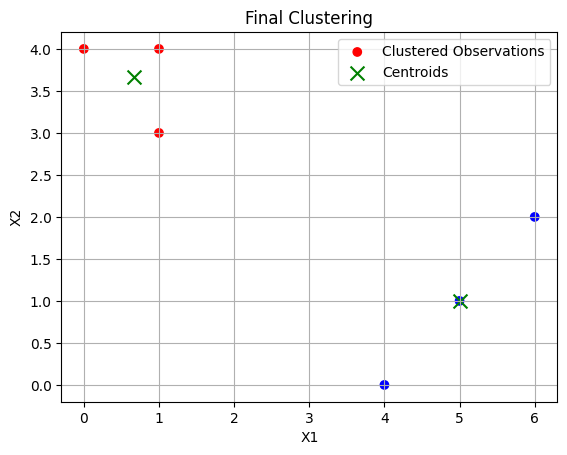

In [10]:
# (f) Plot with final cluster labels
colors = ['blue' if label == 1 else 'red' for label in new_labels]
plt.scatter(observations[:, 0], observations[:, 1], c=colors, label='Clustered Observations')
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', marker='x', s=100, label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Final Clustering')
plt.grid(True)
plt.legend()
plt.show()

In this chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let, $$ r_{ij} $$ denote the correlation between the i-th and j-th observations, then the quantity, $$ 1 - r_{ij} $$ is proportional to the squared Euclidean distance between the i-th and j-th observations. On the USArrests data, show that this proportionality holds.

**Hint:** The Euclidean distance can be calculated using the `pairwise_distances()` function from the `sklearn.metrics` module, and correlations can be calculated using the `np.corrcoef()` function.

In [11]:
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from statsmodels.datasets import get_rdataset
import matplotlib.pyplot as plt

In [12]:
USArrests = get_rdataset('USArrests').data
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [13]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
data_standardized = scaler.fit_transform(USArrests)

In [14]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(data_standardized, rowvar=True)

# Calculate the Euclidean distances
euclidean_distances = pairwise_distances(data_standardized, metric='euclidean')

# Calculate the squared Euclidean distances
squared_euclidean_distances = euclidean_distances ** 2

# Calculate 1 - correlation
one_minus_correlation = 1 - correlation_matrix

In [15]:
# Show proportionality
print("Squared Euclidean Distances:")
print(squared_euclidean_distances.shape)

print("\n1 - Correlation:")
print(one_minus_correlation.shape)

Squared Euclidean Distances:
(50, 50)

1 - Correlation:
(50, 50)


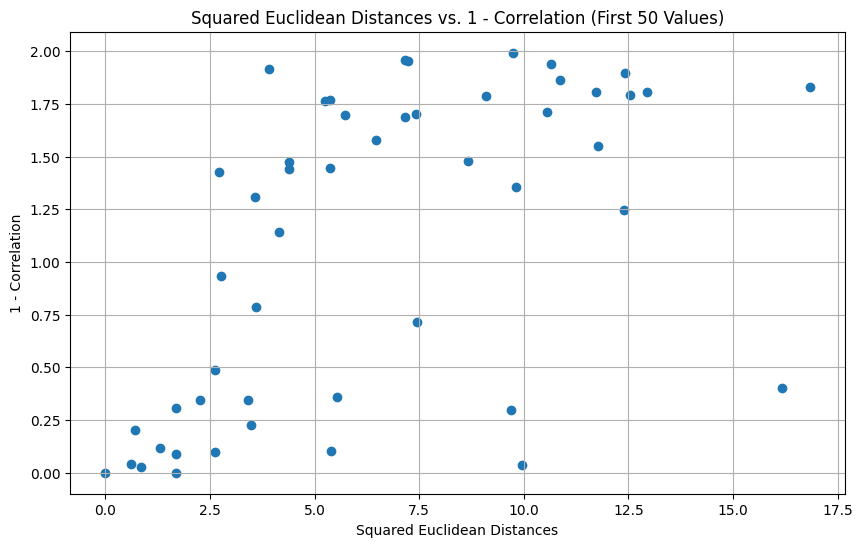

In [16]:
x = squared_euclidean_distances[0, :50]
y = one_minus_correlation[0, :50]

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel("Squared Euclidean Distances")
plt.ylabel("1 - Correlation")
plt.title("Squared Euclidean Distances vs. 1 - Correlation (First 50 Values)")
plt.grid(True)
plt.show()


In Section 12.2.3, a formula for calculating PVE was given in Equation 12.10. We also saw that the PVE can be obtained using the `explained_variance_ratio_` attribute of a fitted `PCA()` estimator.

On the USArrests data, calculate PVE in two ways:

(a) Using the `explained_variance_ratio_` output of the fitted `PCA()` estimator
As was done in Section 12.2.3.

(b) By applying Equation 12.10 directly
The loadings are stored as the `components_` attribute of the fitted `PCA()` estimator. Use those loadings in Equation 12.10 to obtain the PVE.

These two approaches should give the same results.

**Hint:** You will only obtain the same results in (a) and (b) if the same data is used in both cases. For instance, if in (a) you performed `PCA()` using centered and scaled variables, then you must center and scale the variables before applying Equation 12.10 in (b).

In [17]:
from sklearn.decomposition import PCA

In [35]:
pcaUS = PCA()
pcaUS.fit(data_standardized)

pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [34]:
loadings = pcaUS.components_

total_variance = np.sum(np.var(data_standardized, axis=0))
explained_variance = np.sum((data_standardized @ loadings.T) ** 2, axis=0) / (data_standardized.shape[0] - 1)

explained_variance / total_variance

array([0.63271469, 0.25249111, 0.09096   , 0.04424237])

Consider the USArrests data. We will now perform hierarchical clustering on the states.

(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

(d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

In [37]:
!pip install ISLP
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
 

In [53]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete',
                 metric='euclidean')
hc_comp.fit(USArrests)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

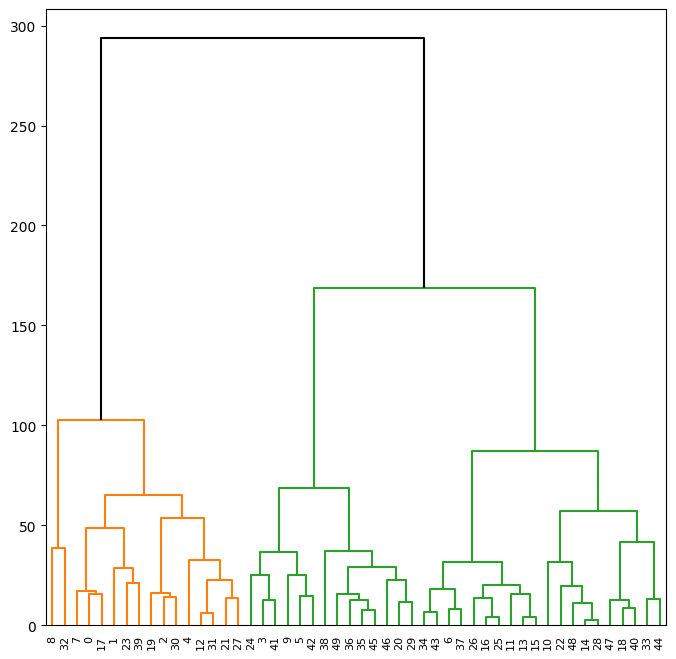

In [59]:
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           above_threshold_color='black');

In [56]:
cut_tree(linkage_comp, n_clusters=3).T

array([[0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
        2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
        2, 1, 1, 2, 2, 1]])

In [61]:
hc_comp.fit(data_standardized)
linkage_comp_std = compute_linkage(hc_comp)
cut_tree(linkage_comp_std, n_clusters=3).T

array([[0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
        2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2,
        2, 2, 2, 2, 2, 2]])

Effect of Scaling:

* Without Scaling: Variables with larger ranges can dominate the distance calculations, potentially skewing the clustering results.

* With Scaling: Each variable contributes equally to the distance calculations, leading to a more balanced clustering.

Recommendation:

It is generally advisable to scale the variables before computing inter-observation dissimilarities, especially when the variables are on different scales. This ensures that each variable contributes equally to the distance calculations, leading to more meaningful clustering results.
